<a href="https://colab.research.google.com/github/scobb052/predictive-modeling-portfolio/blob/main/ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
#pip install kagglehub[pandas-datasets]
#import kagglehub
#from kagglehub import KaggleDatasetAdapter



















In [3]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"scobb0522","key":"d27a15c4ba87c1bc15e3ce0ea6d2d3c6"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets list -s "online retail"

ref                                                   title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
tunguz/online-retail                                  Online Retail                                        7471504  2021-04-12 21:49:08.737000           8522         76  1.0              
ulrikthygepedersen/online-retail-dataset              Online Retail Dataset                                7742495  2023-01-20 13:50:59.410000           9590         88  1.0              
mashlyn/online-retail-ii-uci                          Online Retail II UCI                                15217139  2019-12-02 11:03:36.200000          20756        189  1.0              
ishanshrivastava28/tata-online-retail-dataset         TATA: 

In [7]:
!kaggle datasets download -d "carrie1/ecommerce-data"

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown


In [8]:
!unzip ecommerce-data.zip

Archive:  ecommerce-data.zip
  inflating: data.csv                


In [9]:
import pandas as pd
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



--- Frequency Bar Plot using Seaborn ---


<ipython-input-10-05a22a384066>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Frequency', data=frequency_df, palette='viridis')


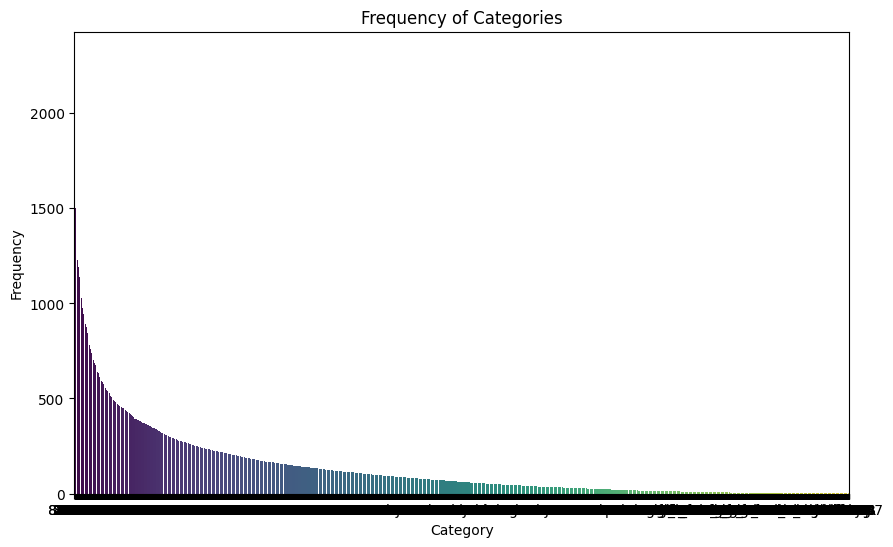

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- Data Preparation for Frequency Bar Plot ---

# Calculate the frequency of each category
frequency_counts = df['StockCode'].value_counts().sort_values(ascending=False)
# Convert the frequency counts to a DataFrame for easier plotting with seaborn
frequency_df = pd.DataFrame({'Category': frequency_counts.index,
                             'Frequency': frequency_counts.values})

# --- Creating the Frequency Bar Plot using Seaborn ---
print("\n--- Frequency Bar Plot using Seaborn ---")
plt.figure(figsize=(10, 6)) #(width=10 inches, height=6 inches)
sns.barplot(x='Category', y='Frequency', data=frequency_df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()


In [ ]:
#dimensions of data
frequency_counts.shape
frequency_counts.head()

#frequency of items purchased
grouped_counts = df.groupby(['StockCode', 'Description']).size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False)
print(grouped_counts)

     StockCode                         Description  Frequency
4223    85123A  WHITE HANGING HEART T-LIGHT HOLDER       2302
1554     22423            REGENCY CAKESTAND 3 TIER       2200
4197    85099B             JUMBO BAG RED RETROSPOT       2159
3295     47566                       PARTY BUNTING       1727
210      20725             LUNCH BAG RED RETROSPOT       1638
...        ...                                 ...        ...
736      21491     SET OF THREE VINTAGE GIFT WRAPS          1
3950    84876D                             damaged          1
274      20827                             damages          1
280      20832                               check          1
783      21578                                   ?          1

[4792 rows x 3 columns]


Top 10 Frequencies:
     StockCode                         Description  Frequency
4223    85123A  WHITE HANGING HEART T-LIGHT HOLDER       2302
1554     22423            REGENCY CAKESTAND 3 TIER       2200
4197    85099B             JUMBO BAG RED RETROSPOT       2159
3295     47566                       PARTY BUNTING       1727
210      20725             LUNCH BAG RED RETROSPOT       1638
3956     84879       ASSORTED COLOUR BIRD ORNAMENT       1501
1890     22720   SET OF 3 CAKE TINS PANTRY DESIGN        1473
531      21212     PACK OF 72 RETROSPOT CAKE CASES       1385
213      20727             LUNCH BAG  BLACK SKULL.       1350
1593     22457     NATURAL SLATE HEART CHALKBOARD        1280

--- Seaborn Plot ---


<ipython-input-22-d780533c7549>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Description", y='Frequency', data=top_10_frequencies, palette='viridis')


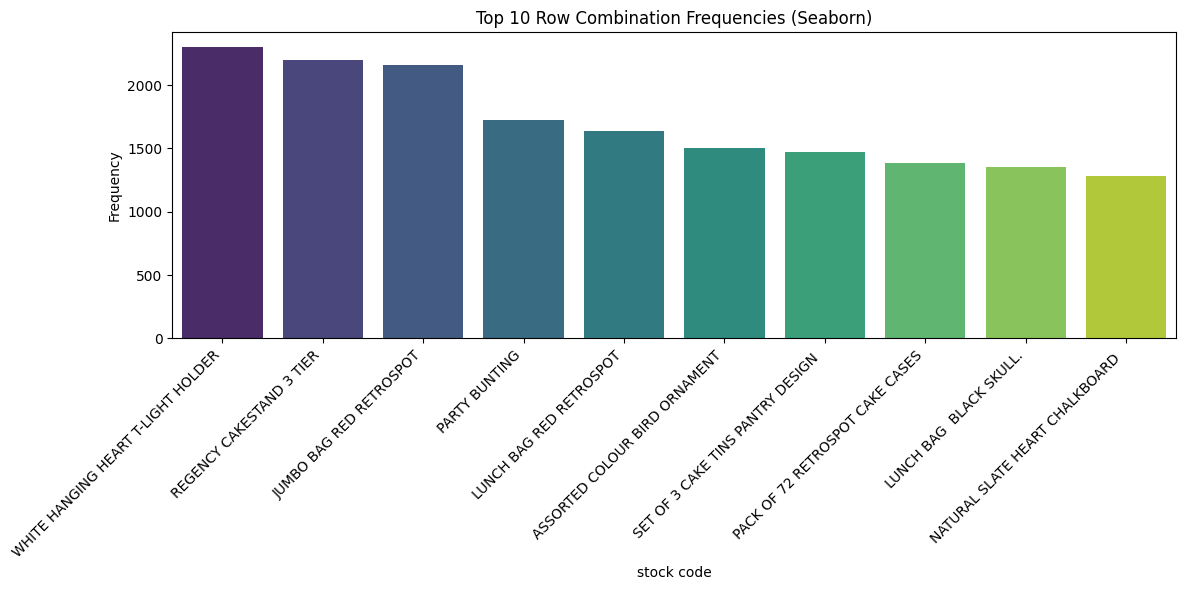

In [ ]:
# Get the top 10 frequencies
top_10_frequencies = grouped_counts.nlargest(10, 'Frequency')

print("Top 10 Frequencies:")
print(top_10_frequencies)



# --- Plotting with Seaborn ---
print("\n--- Seaborn Plot ---")
plt.figure(figsize=(12, 6))
#sns.barplot(x=top_10_frequencies.index.astype(str), y='Frequency', data=top_10_frequencies, palette='viridis')
sns.barplot(x="Description", y='Frequency', data=top_10_frequencies, palette='viridis')
plt.xlabel('stock code')
plt.ylabel('Frequency')
plt.title('Top 10 Row Combination Frequencies (Seaborn)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#most items brought by a customer
counts_by_customer = df.groupby(['CustomerID']).size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False)
print(counts_by_customer)
print(counts_by_customer['Frequency'].max())
print(counts_by_customer['Frequency'].min())




      CustomerID  Frequency
4042     17841.0       7983
1895     14911.0       5903
1300     14096.0       5128
330      12748.0       4642
1674     14606.0       2782
...          ...        ...
467      12943.0          1
4295     18184.0          1
4287     18174.0          1
4334     18233.0          1
603      13135.0          1

[4372 rows x 2 columns]
7983
1


In [12]:
#how many times has a particular customer shopped
customer_counts = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False)
print(customer_counts)

#customer_visits = df.groupby(['CustomerID','InvoiceNo']).size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False)
#print(customer_visits)

customer_counts['GT1'] = (customer_counts['Frequency'] > 1).astype(int)
print(customer_counts)


      CustomerID  Frequency
1895     14911.0        248
330      12748.0        224
4042     17841.0        169
1674     14606.0        128
2192     15311.0        118
...          ...        ...
4339     18240.0          1
27       12378.0          1
4355     18262.0          1
14       12361.0          1
10       12357.0          1

[4372 rows x 2 columns]
      CustomerID  Frequency  GT1
1895     14911.0        248    1
330      12748.0        224    1
4042     17841.0        169    1
1674     14606.0        128    1
2192     15311.0        118    1
...          ...        ...  ...
4339     18240.0          1    0
27       12378.0          1    0
4355     18262.0          1    0
14       12361.0          1    0
10       12357.0          1    0

[4372 rows x 3 columns]


In [17]:
#distribution of customer frequency
import plotly.express as px
import numpy as np

fig = px.histogram(customer_counts, x="Frequency",
                   title='Histogram of customer shopping visits',
                   labels={'Frequency':'Number of Shopping Visits'} # can specify one label per df column
                   )
fig.show()

fig2 = px.box(customer_counts, y="Frequency")
fig2.show()

quantiles = customer_counts['Frequency'].quantile([0.25, 0.5, 0.75,0.90])
quantiles

,Frequency
0.25,1.0
0.50,3.0
0.75,5.0


Most customers visit between 1-5 times.

In [24]:
perc_return=customer_counts.groupby('GT1').size().reset_index(name='counts')

#perc_return.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
perc_return['perc']=perc_return['counts']/perc_return['counts'].sum()
perc_return

,GT1,counts,perc
0,0,1313,0.30032
1,1,3059,0.69968


About 70% are return customers.

In [ ]:
#customer volume over time


In [ ]:
#frequency of stock code
#number of items ordered per customer
#number of return customers
#count of product types over time
#distribution of cost over times
#distribution of cost by customer

In [ ]:
#research question

